In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
from costs import *
from grid_search import *
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    a = np.matmul(np.transpose(tx),tx)
    b = np.matmul(np.transpose(tx),y)
    w = np.linalg.solve(a,b)
    MSE = compute_loss(y, tx, w)
    return MSE, w
    # ***************************************************
    raise NotImplementedError

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    #grid search
    w0, w1 = generate_w(100)
    losses = grid_search(y, tx, w0, w1)
    loss_star, w0_star, w1_star = get_best_parameters(w0, w1, losses)
    
    #least squares
    MSE, w = least_squares(y, tx)
    print('least squares w = :',w, '\n')
    print('grid search w = :',w0_star, w1_star)
    # ***************************************************
    #raise NotImplementedError

Test it here

In [4]:
test_your_least_squares()

least squares w = : [73.293922   13.47971243] 

grid search w = : 72.72727272727272 13.636363636363626


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [24]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [25]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    phi = np.zeros((degree+1, len(x)))
    for i in range(degree+1):
        phi[i] = x**i
    return phi
    # ***************************************************
    raise NotImplementedError

In [26]:
datatest = np.asarray([1,2,3,4])
print(build_poly(datatest,3))

[[ 1.  1.  1.  1.]
 [ 1.  2.  3.  4.]
 [ 1.  4.  9. 16.]
 [ 1.  8. 27. 64.]]


Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [27]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        x, y = load_data()
        phi = build_poly(x, degree)
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        #raise NotImplementedError
        # ***************************************************
        mse, weights = least_squares(y, phi)
        rmse = np.sqrt(2*mse)
        # ***************************************************
        #raise NotImplementedError

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.24965870360907327
Processing 4th experiment, degree=12, rmse=0.24328247483727994


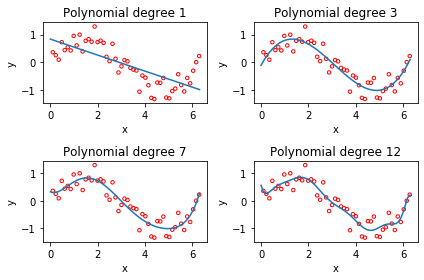

In [28]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [29]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    part = int(np.rint(ratio*len(y)))
    ind = np.linspace(0,len(y)-1,len(y),dtype=np.int16)
    trainind = np.random.choice(ind,part,replace=False)
    trainx = x[trainind]
    trainy = y[trainind]
    testx = np.delete(x,trainind)
    testy = np.delete(y,trainind)
    print(trainind)
    return trainx,trainy,testx,testy
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    raise NotImplementedError

Then, test your `split_data` function below.

In [30]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    trainx,trainy,testx,testy = split_data(x, y, ratio)
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    phitrain = build_poly(trainx, degree)
    phitest = build_poly(testx, degree)
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    msetr, weights = least_squares(trainy, phitrain)
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    rmse_tr = np.sqrt(2*msetr)
    rmse_te = np.sqrt(2*compute_loss(testy, phitest, weights))
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    #raise NotImplementedError
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [31]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

[27 35 40 38  2  3 48 29 46 31 32 39 21 36 19 42 49 26 22 13 41 17 45 24
 23  4 33 14 30 10 28 44 34 18 20 25  6  7 47  1 16  0 15  5 11]
proportion=0.9, degree=1, Training RMSE=0.455, Testing RMSE=0.621
[27 35 40 38  2  3 48 29 46 31 32 39 21 36 19 42 49 26 22 13 41 17 45 24
 23  4 33 14 30 10 28 44 34 18 20 25  6  7 47  1 16  0 15  5 11]
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.214
[27 35 40 38  2  3 48 29 46 31 32 39 21 36 19 42 49 26 22 13 41 17 45 24
 23  4 33 14 30 10 28 44 34 18 20 25  6  7 47  1 16  0 15  5 11]
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.189
[27 35 40 38  2  3 48 29 46 31 32 39 21 36 19 42 49 26 22 13 41 17 45 24
 23  4 33 14 30 10 28 44 34 18 20 25  6  7 47  1 16  0 15  5 11]
proportion=0.9, degree=12, Training RMSE=0.248, Testing RMSE=0.219
[27 35 40 38  2  3 48 29 46 31 32 39 21 36 19 42 49 26 22 13 41 17 45 24
 23]
proportion=0.5, degree=1, Training RMSE=0.400, Testing RMSE=0.553
[27 35 40 38  2  3 48 29 46 31 32 39 21

# 3 Ridge Regression
Please fill in the function below.

In [32]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    a = np.matmul(np.transpose(tx),tx)+(2*len(y)*lambda_*np.eye(tx.shape[1]))
    b = np.matmul(np.transpose(tx),y)
    w = np.linalg.solve(a,b)
    #mul = np.matmul(np.transpose(tx),tx)+lambda_*np.eye(tx.shape[1])
    #inv = np.linalg.inv(mul)
    #w = np.matmul(np.matmul(inv,np.transpose(tx)),y)
    MSE = compute_loss(y, tx, w)
    return MSE,w
    # ***************************************************
    raise NotImplementedError

In [33]:
#testing ridge implementation
height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
data, mean_data, std_data = standardize(height)
label, tdata = build_model_data(data, weight)

print(ridge_regression(label, tdata, 1))

(1249.5418100423128, array([24.43130733,  4.49323748]))


In [36]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    trainx,trainy,testx,testy = split_data(x, y, ratio)
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    phitrain = build_poly(trainx, degree)
    phitest = build_poly(testx, degree)
    # ***************************************************
    #raise NotImplementedError

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        mse, weights = ridge_regression(trainy, phitrain, lambda_)
        rmse_tr.append(np.sqrt(2*mse))
        rmse_te.append(np.sqrt(2*compute_loss(testy, phitest, weights)))
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

    #raise NotImplementedError


[27 35 40 38  2  3 48 29 46 31 32 39 21 36 19 42 49 26 22 13 41 17 45 24
 23]
0.024284744815740722
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.220, Testing RMSE=0.319
0.024744333617230514
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.222, Testing RMSE=0.319
0.025229373770232072
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.225, Testing RMSE=0.322
0.025581098883231852
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.226, Testing RMSE=0.325
0.02578555754323646
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.327
0.025905051488597296
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.329
0.026002741890998275
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.329
0.026117647391256684
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.229, Testing RMSE=0.327
0.02630883963067424
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.229, Testing RMSE=0.319
0.0268331078034

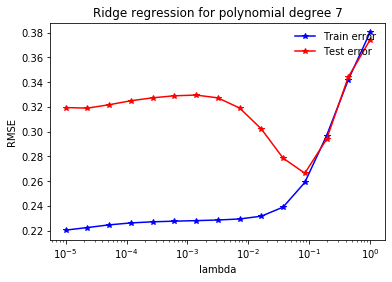

In [37]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)